In [1]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
np.random.seed(45)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv("C:/Users/manup/ML/Spooky_train.csv",encoding = "ISO-8859-1", dtype={'text':str})
dataset.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
dataset.shape

(19579, 3)

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64


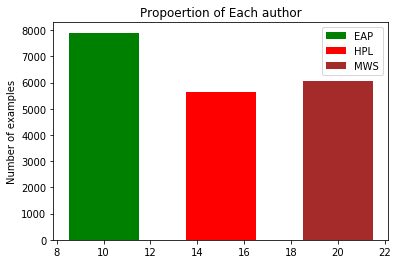

In [4]:
EAP_count = dataset[dataset['author'] == 'EAP'].shape[0]
HPL_count = dataset[dataset['author'] == 'HPL'].shape[0]
MWS_count = dataset[dataset['author'] == 'MWS'].shape[0]

print(dataset['author'].value_counts())

plt.bar(10,EAP_count,3, label="EAP",color=['green'])
plt.bar(15,HPL_count,3, label="HPL",color=['red'])
plt.bar(20,MWS_count,3, label="MWS",color=['brown'])
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of Each author')
plt.show()

In [5]:
def length(text):    
    return len(text)

dataset['length'] = dataset['text'].apply(length)
dataset.head(10)

,id,text,author,length
0,id26305,"This process, however, afforded me no means of...",EAP,231
1,id17569,It never once occurred to me that the fumbling...,HPL,71
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174
5,id22965,"A youth passed in solitude, my best years spen...",MWS,468
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,128
7,id13515,The surcingle hung in ribands from my body.,EAP,43
8,id19322,I knew that you could not say to yourself 'ste...,EAP,488
9,id00912,I confess that neither the structure of langua...,MWS,144


In [6]:
EAP_data = dataset[dataset['author'] == 'EAP']
HPL_data = dataset[dataset['author'] == 'HPL']
MWS_data = dataset[dataset['author'] == 'MWS']

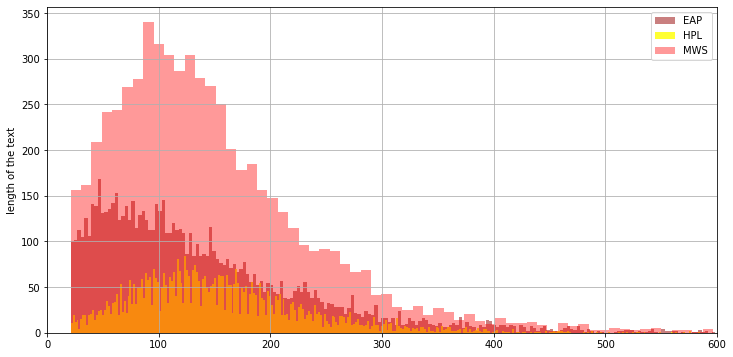

In [7]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP',color=['brown'])
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL',color=['yellow'])
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS',color=['red'])
plt.ylabel('length of the text')
plt.legend(loc='upper right')
plt.xlim(0,600)
plt.grid()
plt.show()

In [8]:
dataset.drop(['id'], axis = 1, inplace = True)
dataset.drop(['length'], axis = 1, inplace = True)

In [9]:
# extracting the stopwords from nltk library
sw = (stopwords.words('english'))
np.array(sw)

print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [10]:
#function for removing the stopword
def stopwords(text):
    word_tokens = word_tokenize(text)
    text = [word.lower() for word in word_tokens if word.lower() not in sw]
    return " ".join(text)

In [11]:
dataset['text'] = dataset['text'].apply(stopwords)
dataset.head(10)

,text,author
0,"process , however , afforded means ascertainin...",EAP
1,never occurred fumbling might mere mistake .,HPL
2,"left hand gold snuff box , , capered hill , cu...",EAP
3,lovely spring looked windsor terrace sixteen f...,MWS
4,"finding nothing else , even gold , superintend...",HPL
5,"youth passed solitude , best years spent gentl...",MWS
6,"astronomer , perhaps , point , took refuge sug...",EAP
7,surcingle hung ribands body .,EAP
8,knew could say 'stereotomy ' without brought t...,EAP
9,"confess neither structure languages , code gov...",MWS


In [12]:
#function for removing punctuation
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [13]:
dataset['text'] = dataset['text'].apply(remove_punctuation)
print(dataset.head(10))

                                                text author
0  process  however  afforded means ascertaining ...    EAP
1        never occurred fumbling might mere mistake     HPL
2  left hand gold snuff box   capered hill  cutti...    EAP
3  lovely spring looked windsor terrace sixteen f...    MWS
4  finding nothing else  even gold  superintenden...    HPL
5  youth passed solitude  best years spent gentle...    MWS
6  astronomer  perhaps  point  took refuge sugges...    EAP
7                       surcingle hung ribands body     EAP
8  knew could say stereotomy  without brought thi...    EAP
9  confess neither structure languages  code gove...    MWS


In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    word_tokens = word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return  " ".join(lemmatized_word) 


dataset['text'] = dataset['text'].apply(lemmatize)
print (dataset.head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manup\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text author
0  process however afforded mean ascertaining dim...    EAP
1         never occurred fumbling might mere mistake    HPL
2  left hand gold snuff box capered hill cutting ...    EAP
3  lovely spring looked windsor terrace sixteen f...    MWS
4  finding nothing else even gold superintendent ...    HPL
5  youth passed solitude best year spent gentle f...    MWS
6  astronomer perhaps point took refuge suggestio...    EAP
7                         surcingle hung riband body    EAP
8  knew could say stereotomy without brought thin...    EAP
9  confess neither structure language code govern...    MWS


In [15]:
stemmer = SnowballStemmer("english")

def stemming(text): 
    word_tokens = word_tokenize(text)
    text = [stemmer.stem(word) for word in word_tokens]
    return " ".join(text)


In [16]:
dataset['text'] = dataset['text'].apply(stemming)
print (dataset.head(10))

                                                text author
0  process howev afford mean ascertain dimens dun...    EAP
1                never occur fumbl might mere mistak    HPL
2  left hand gold snuff box caper hill cut manner...    EAP
3  love spring look windsor terrac sixteen fertil...    MWS
4  find noth els even gold superintend abandon at...    HPL
5  youth pass solitud best year spent gentl femin...    MWS
6  astronom perhap point took refug suggest non l...    EAP
7                          surcingl hung riband bodi    EAP
8  knew could say stereotomi without brought thin...    EAP
9  confess neither structur languag code govern p...    MWS


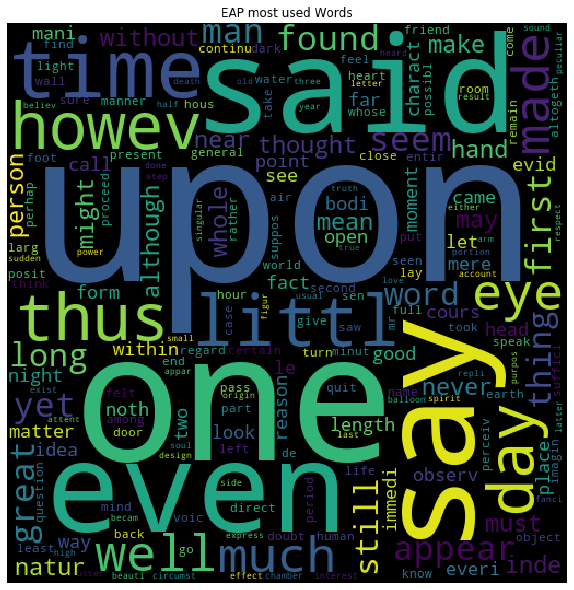

In [17]:
EAP_words = ' '.join(list(dataset[dataset['author'] == 'EAP']['text']))
EAP_wc = WordCloud(width = 512,height = 512).generate(EAP_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.title("EAP most used Words")
plt.imshow(EAP_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

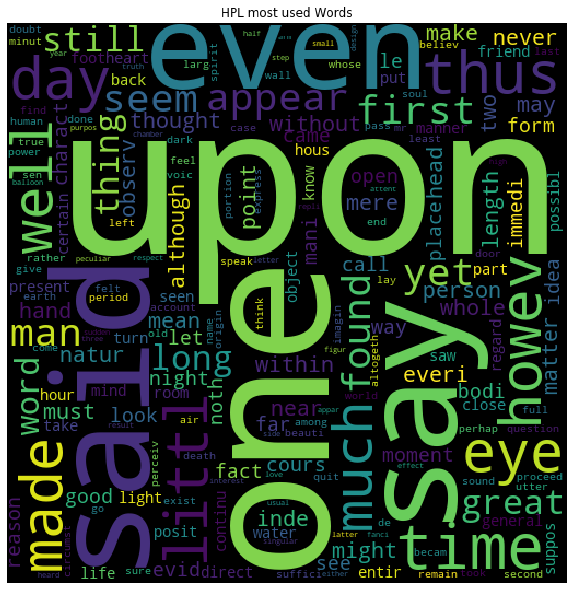

In [18]:
HPL_words = ' '.join(list(dataset[dataset['author'] == 'HPL']['text']))
HPL_wc = WordCloud(width = 512,height = 512).generate(EAP_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.title("HPL most used Words")
plt.imshow(HPL_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

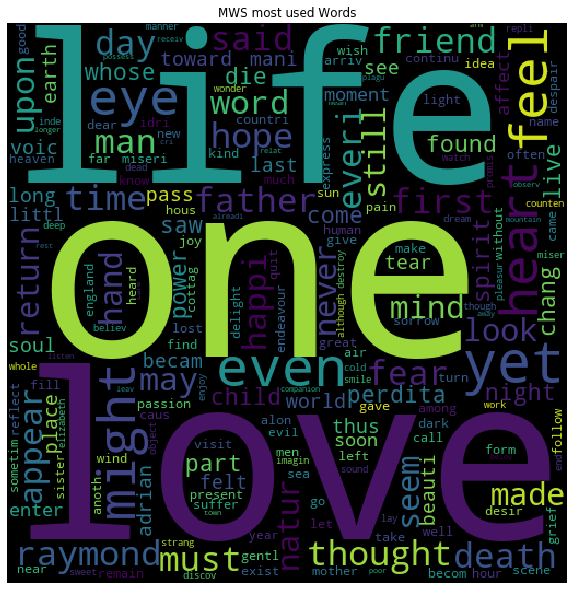

In [19]:
MWS_words = ' '.join(list(dataset[dataset['author'] == 'MWS']['text']))
MWS_wc = WordCloud(width = 512,height = 512).generate(MWS_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.title("MWS most used Words")
plt.imshow(MWS_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [20]:
X = dataset['text']
y = dataset['author']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
import seaborn as sns
def plot_cm(labels, predictions,title):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True,cmap="YlGnBu", fmt="d")
  plt.title(title)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-4, random_state=42, max_iter=10, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred_SDG = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_SDG, y_test))
print(classification_report(y_test, y_pred_SDG))


accuracy 0.8207354443309499
              precision    recall  f1-score   support

         EAP       0.81      0.85      0.83      1600
         HPL       0.82      0.80      0.81      1102
         MWS       0.83      0.80      0.81      1214

    accuracy                           0.82      3916
   macro avg       0.82      0.82      0.82      3916
weighted avg       0.82      0.82      0.82      3916



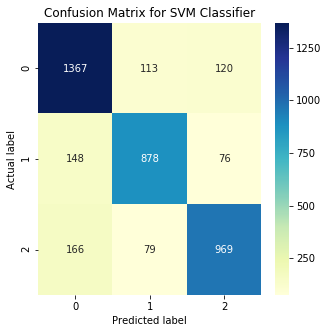

In [23]:
plot_cm(y_test, y_pred_SDG ,"Confusion Matrix for SVM Classifier")

In [24]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha = 0.020799)),
              ])
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_nb, y_test))
print(classification_report(y_test, y_pred_nb))

accuracy 0.8378447395301328
              precision    recall  f1-score   support

         EAP       0.84      0.84      0.84      1600
         HPL       0.86      0.82      0.84      1102
         MWS       0.82      0.85      0.83      1214

    accuracy                           0.84      3916
   macro avg       0.84      0.84      0.84      3916
weighted avg       0.84      0.84      0.84      3916



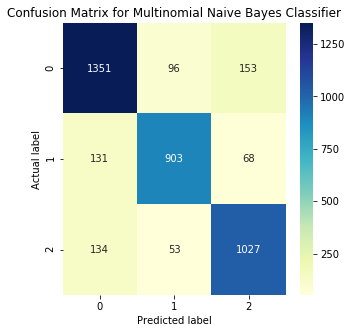

In [25]:
plot_cm(y_test, y_pred_nb,"Confusion Matrix for Multinomial Naive Bayes Classifier")

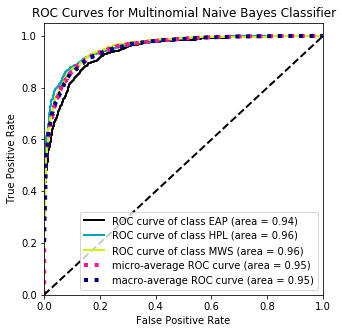

In [26]:
import scikitplot as skplt
y_true =y_test # ground truth labels
y_probas =nb.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas, figsize =(5,5))
plt.title("ROC Curves for Multinomial Naive Bayes Classifier")
plt.show()